In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import re
from importlib import reload
import warnings
from pprint import pprint
import string
import pyLDAvis.gensim as gensimvis
import pickle 
import pyLDAvis
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
STOPWORDS.update(["a","will","el","del","lo", "abord", "absolument", "afin", "ah", "ai", "aie", "aient", "aies", "ailleurs", "ainsi", "ait", "allaient", "allo",
 "allons", "allô", "alors", "anterieur", "anterieure", "anterieures", "apres", "après", "as", "assez", "attendu", "au",
 "aucun", "aucune", "aucuns", "aujourd", "aujourd'hui", "aupres", "auquel", "aura", "aurai", "auraient", "aurais",
 "aurait", "auras", "aurez", "auriez", "aurions", "aurons", "auront", "aussi", "autant", "autre", "autrefois",
 "autrement", "autres", "autrui", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", "avec", "avez",
 "aviez", "avions", "avoir", "avons", "ayant", "ayez", "ayons", "b", "bah", "bas", "basee", "bat", "beau", "beaucoup",
 "bien", "bigre", "bon", "boum", "bravo", "brrr", "c", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là",
 "celles", "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "celà", "cent", "cependant", "certain",
 "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", "ceux-là", "chacun",
 "chacune", "chaque", "cher", "chers", "chez", "chiche", "chut", "chère", "chères", "ci", "cinq", "cinquantaine",
 "cinquante", "cinquantième", "cinquième", "clac", "clic", "combien", "comme", "comment", "comparable", "comparables",
 "compris", "concernant", "contre", "couic", "crac", "d", "da", "dans", "de", "debout", "dedans", "dehors", "deja",
 "delà", "depuis", "dernier", "derniere", "derriere", "derrière", "des", "desormais", "desquelles", "desquels",
 "dessous", "dessus", "deux", "deuxième", "deuxièmement", "devant", "devers", "devra", "devrait", "different",
 "differentes", "differents", "différent", "différente", "différentes", "différents", "dire", "directe", "directement",
 "dit", "dite", "dits", "divers", "diverse", "diverses", "dix", "dix-huit", "dix-neuf", "dix-sept", "dixième", "doit",
 "doivent", "donc", "dont", "dos", "douze", "douzième", "dring", "droite", "du", "duquel", "durant", "dès", "début",
 "désormais", "e", "effet", "egale", "egalement", "egales", "eh", "elle", "elle-même", "elles", "elles-mêmes", "en",
 "encore", "enfin", "entre", "envers", "environ", "es", "essai", "est", "et", "etant", "etc", "etre", "eu", "eue",
 "eues", "euh", "eurent", "eus", "eusse", "eussent", "eusses", "eussiez", "eussions", "eut", "eux", "eux-mêmes",
 "exactement", "excepté", "extenso", "exterieur", "eûmes", "eût", "eûtes", "f", "fais", "faisaient", "faisant", "fait",
 "faites", "façon", "feront", "fi", "flac", "floc", "fois", "font", "force", "furent", "fus", "fusse", "fussent",
 "fusses", "fussiez", "fussions", "fut", "fûmes", "fût", "fûtes", "g", "gens", "h", "ha", "haut", "hein", "hem", "hep",
 "hi", "ho", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", "huitième", "hum", "hurrah", "hé",
 "hélas", "i", "ici", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "juste", "k", "l", "la", "laisser",
 "laquelle", "las", "le", "lequel", "les", "lesquelles", "lesquels", "leur", "leurs", "longtemps", "lors", "lorsque",
 "lui", "lui-meme", "lui-même", "là", "lès", "m", "ma", "maint", "maintenant", "mais", "malgre", "malgré", "maximale",
 "me", "meme", "memes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "mine", "minimale",
 "moi", "moi-meme", "moi-même", "moindres", "moins", "mon", "mot", "moyennant", "multiple", "multiples", "même",
 "mêmes", "n", "na", "naturel", "naturelle", "naturelles", "ne", "neanmoins", "necessaire", "necessairement", "neuf",
 "neuvième", "ni", "nombreuses", "nombreux", "nommés", "non", "nos", "notamment", "notre", "nous", "nous-mêmes",
 "nouveau", "nouveaux", "nul", "néanmoins", "nôtre", "nôtres", "o", "oh", "ohé", "ollé", "olé", "on", "ont", "onze",
 "onzième", "ore", "ou", "ouf", "ouias", "oust", "ouste", "outre", "ouvert", "ouverte", "ouverts", "o|", "où", "p",
 "paf", "pan", "par", "parce", "parfois", "parle", "parlent", "parler", "parmi", "parole", "parseme", "partant",
 "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "pense", "permet", "personne",
 "personnes", "peu", "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "pire", "pièce", "plein", "plouf",
 "plupart", "plus", "plusieurs", "plutôt", "possessif", "possessifs", "possible", "possibles", "pouah", "pour",
 "pourquoi", "pourrais", "pourrait", "pouvait", "prealable", "precisement", "premier", "première", "premièrement",
 "pres", "probable", "probante", "procedant", "proche", "près", "psitt", "pu", "puis", "puisque", "pur", "pure", "q",
 "qu", "quand", "quant", "quant-à-soi", "quanta", "quarante", "quatorze", "quatre", "quatre-vingt", "quatrième",
 "quatrièmement", "que", "quel", "quelconque", "quelle", "quelles", "quelqu'un", "quelque", "quelques", "quels", "qui",
 "quiconque", "quinze", "quoi", "quoique", "r", "rare", "rarement", "rares", "relative", "relativement", "remarquable",
 "rend", "rendre", "restant", "reste", "restent", "restrictif", "retour", "revoici", "revoilà", "rien", "s", "sa",
 "sacrebleu", "sait", "sans", "sapristi", "sauf", "se", "sein", "seize", "selon", "semblable", "semblaient", "semble",
 "semblent", "sent", "sept", "septième", "sera", "serai", "seraient", "serais", "serait", "seras", "serez", "seriez",
 "serions", "serons", "seront", "ses", "seul", "seule", "seulement", "si", "sien", "sienne", "siennes", "siens",
 "sinon", "six", "sixième", "soi", "soi-même", "soient", "sois", "soit", "soixante", "sommes", "son", "sont", "sous",
 "souvent", "soyez", "soyons", "specifique", "specifiques", "speculatif", "stop", "strictement", "subtiles",
 "suffisant", "suffisante", "suffit", "suis", "suit", "suivant", "suivante", "suivantes", "suivants", "suivre", "sujet",
 "superpose", "sur", "surtout", "t", "ta", "tac", "tandis", "tant", "tardive", "te", "tel", "telle", "tellement",
 "telles", "tels", "tenant", "tend", "tenir", "tente", "tes", "tic", "tien", "tienne", "tiennes", "tiens", "toc", "toi",
 "toi-même", "ton", "touchant", "toujours", "tous", "tout", "toute", "toutefois", "toutes", "treize", "trente", "tres",
 "trois", "troisième", "troisièmement", "trop", "très", "tsoin", "tsouin", "tu", "té", "u", "un", "une", "unes",
 "uniformement", "unique", "uniques", "uns", "v", "va", "vais", "valeur", "vas", "vers", "via", "vif", "vifs", "vingt",
 "vivat", "vive", "vives", "vlan", "voici", "voie", "voient", "voilà", "voire", "vont", "vos", "votre", "vous",
 "vous-mêmes", "vu", "vé", "vôtre", "vôtres", "w", "x", "y", "z", "zut", "à", "â", "ça", "ès", "étaient", "étais",
 "était", "étant", "état", "étiez", "étions", "été", "étée", "étées", "étés", "êtes", "être", "ô"])

In [3]:
warnings.filterwarnings("ignore")

In [4]:
import clean_tweets_dataframe as cld

In [5]:
reload(cld)

<module 'clean_tweets_dataframe' from 'C:\\Users\\Faith Bagire\\PycharmProjects\\pythonProject\\tweets_analyze\\clean_tweets_dataframe.py'>

In [6]:
df_tweet=pd.read_excel("processed_tweet_data.xlsx",engine='openpyxl',dtype={'tweet_id':'str'})

In [7]:
cleaner=cld.CleanTweets(df_tweet)

Automation in Action...!!!


**Using cleaner module from clean_tweets_dataframe to clean the imported dataset**

In [8]:
df_tweet.shape

(10423, 22)

In [9]:
df_tweet=cleaner.drop_unwanted_column(df_tweet)

In [10]:
df_tweet=cleaner.convert_to_datetime(df_tweet)
df_tweet=cleaner.convert_to_numbers(df_tweet)
df_tweet=cleaner.treat_special_characters(df_tweet)

In [11]:
df_tweet=cleaner.remove_other_languages_tweets(df_tweet)

In [12]:
df_tweet=cleaner.drop_retweets(df_tweet)

In [13]:
print(df_tweet.shape)
df_tweet

(3831, 22)


,created_at,source,original_text,cleaned_text,polarity,subjectivity,sentiment,lang,likes_count,reply_count,...,followers_count,friends_count,possibly_sensitive,hashtags,retweet_hashtags,user_mentions,place,tweet_url,tweet_id,tweet_category
8,2022-07-18 15:25:28+00:00,Twitter for Android,RT @TheoMpoze: ‘It shouldn’t be happening agai...,‘It shouldn’t be happening again’: rebels ret...,-0.150000,0.100000,Negative,en,0,0,...,1579,418,False,"M23, DRC","M23, DRC, Kivu, RDF, Kagame",TheoMpoze,NaN,https://twitter.com/Nduwamungu5/status/1549052...,1549052740772429826,Retweet
9,2022-07-18 15:21:48+00:00,EUwatch,European heat wave: Britain announces national...,European heat wave: Britain announces national...,0.000000,0.000000,Neutral,en,0,0,...,25730,7621,False,NaN,NaN,NaN,brussels,https://twitter.com/EUwatchers/status/15490518...,1549051820839825408,Tweet
12,2022-07-18 15:19:37+00:00,Twitter for Android,RT @EUwatchers: European heat wave: Britain an...,European heat wave: Britain announces national...,0.000000,0.000000,Neutral,en,0,0,...,3903,4278,False,NaN,NaN,EUwatchers,groland,https://twitter.com/Zgur_/status/1549051269184...,1549051269184372736,Retweet
17,2022-07-18 15:14:41+00:00,Microsoft Power Platform,Why are weather forecasts not always accurate?...,Why are weather forecasts not always accurate?...,0.400000,0.633333,Positive,en,0,0,...,118,12,False,123INFO,NaN,NaN,germany,https://twitter.com/123_INFO_DE/status/1549050...,1549050029469364225,Tweet
18,2022-07-18 15:10:04+00:00,Twitter for iPhone,RT @aqlila1: Tried to draw Rovina Desamero of ...,Tried to draw Rovina Desamero of Dosage of Ser...,0.000000,0.000000,Neutral,en,0,0,...,621,1559,False,NaN,NaN,"aqlila1, inksteadywp",farm ni doh kyung soo,https://twitter.com/AriaSoondingie/status/1549...,1549048865307111424,Retweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10412,2022-07-11 15:53:52+00:00,Hootsuite Inc.,Thank you everyone who joined us for our RDF A...,Thank you everyone who joined us for our RDF A...,0.433333,0.505556,Positive,en,6,0,...,2452,340,False,UnidosUS22,NaN,NaN,"phoenix, az",https://twitter.com/RazaFund/status/1546523173...,1546523173314772994,Tweet
10414,2022-07-11 15:51:46+00:00,EUwatch,Srebrenica massacre: Netherlands apologizes af...,Srebrenica massacre: Netherlands apologizes af...,0.000000,0.000000,Neutral,en,0,0,...,25730,7621,False,NaN,NaN,NaN,brussels,https://twitter.com/EUwatchers/status/15465226...,1546522645314904069,Tweet
10416,2022-07-11 15:51:32+00:00,Twitter Web App,"Rwanda Security forces, (RDF &amp; RNP) 70-80...","Rwanda Security forces, (RDF &amp; RNP) 70-80...",0.000000,0.000000,Neutral,en,4,0,...,1580,1591,False,NaN,NaN,NaN,NaN,https://twitter.com/MurindwaJames/status/15465...,1546522588502949888,Tweet
10420,2022-07-11 15:46:37+00:00,Twitter for iPhone,RT @rbarwanda: JUST IN\nPresident Kagame and C...,JUST IN\nPresident Kagame and Commander-In-Chi...,0.037500,0.366667,Positive,en,0,0,...,3792,5000,False,NaN,NaN,rbarwanda,NaN,https://twitter.com/KayinamuraJose4/status/154...,1546521351791542273,Retweet


In [14]:
df_tweet = df_tweet[df_tweet.original_author != 'dwnews']
df_tweet = df_tweet[df_tweet.original_author != '123_INFO_DE']
df_tweet = df_tweet[df_tweet.original_author != 'rogue_corq']
df_tweet = df_tweet[df_tweet.original_author != 'Noticieros_MEX']
df_tweet = df_tweet[df_tweet.original_author != 'EUwatchers']

In [15]:
df_tweet['tweet_category'].value_counts()

Retweet    2780
Reply       386
Tweet       303
Name: tweet_category, dtype: int64

In [16]:
# df_tweet.dtypes

###  Export french tweets, make translation and insert back new translated tweets

In [17]:
df_trans=df_tweet.query("lang=='fr'| lang =='kiny'")[['original_text','cleaned_text','lang']]
df_trans.to_excel('df_to_translate.xlsx')

### translation completed

In [18]:
dict_to_translate=df_tweet.query("lang=='fr'| lang =='kiny'")['cleaned_text'].to_dict()

dict_translated=pd.read_excel('df_translated.xlsx',engine='openpyxl',index_col=0,usecols=[0,4]).to_dict()['translation']

In [19]:
for idx in dict_to_translate.keys():
    df_tweet.loc[idx, 'cleaned_text'] = dict_translated[idx]

In [20]:
df_tweet[['original_author']]

,original_author
8,Nduwamungu5
12,Zgur_
18,AriaSoondingie
19,arson_cole
21,_Jakashi
...,...
10411,SDClimateCollab
10412,RazaFund
10416,MurindwaJames
10420,KayinamuraJose4


In [21]:
from textblob import TextBlob

In [22]:
for idx in dict_translated.keys():
    blob = TextBlob(dict_translated[idx])
    pol=blob.sentiment.polarity
    df_tweet.loc[idx, 'sentiment'] = 'Positive' if pol>0 else ('Negative' if pol < 0 else 'Neutral')

#### Save new dataframe for dashboard creation

In [23]:
df_tweet['created_at'] = df_tweet['created_at'].apply(lambda x: x.replace(tzinfo=None))

In [24]:
df_tweet.to_excel('plotly_dashboard/processed_tweet_data.xlsx')

**Now we continue with Tweet and Replies Only! Excluding Retweets**

In [25]:
df_tweet=df_tweet.query("tweet_category=='Tweet' or tweet_category== 'Reply'")

In [26]:
df_tweet = df_tweet[df_tweet.original_author != 'republikaonline']
df_tweet = df_tweet[df_tweet.original_author != 'dwnews']
df_tweet = df_tweet[df_tweet.original_author != '123_INFO_DE']
df_tweet = df_tweet[df_tweet.original_author != 'rogue_corq']
df_tweet = df_tweet[df_tweet.original_author != 'Noticieros_MEX']

In [27]:
# d_mostflwd=df_tweet[['original_author']]

In [28]:
# d_mostflwd.dropna(inplace=True)
# d_mostflwd['hh']=d_mostflwd['original_author'].apply(lambda x : '['+x+']'+'(https://twitter.com/'+str(x)+')')

### EDA of Tweets

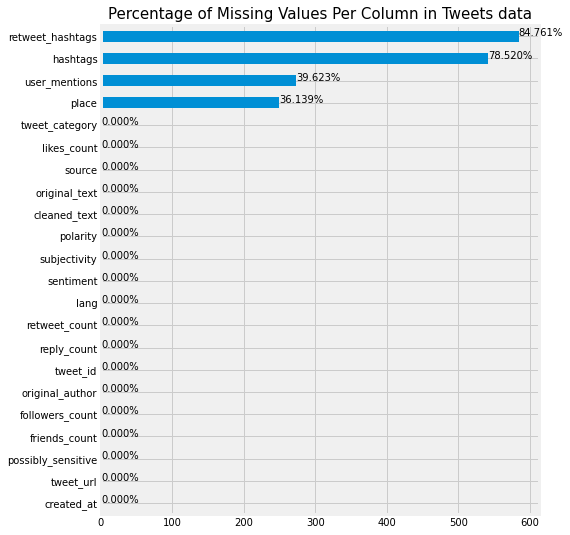

In [29]:
# Check the percentage of missing values in every column
ax = df_tweet.isna().sum().sort_values().plot(kind = 'barh', figsize = (7, 9))
plt.title('Percentage of Missing Values Per Column in Tweets data', fontdict={'size':15})

for p in ax.patches:
    percentage ='{:,.3f}%'.format((p.get_width()/df_tweet.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [30]:
# dict(df_tweet['place'].value_counts()).keys()

<AxesSubplot:ylabel='Place'>

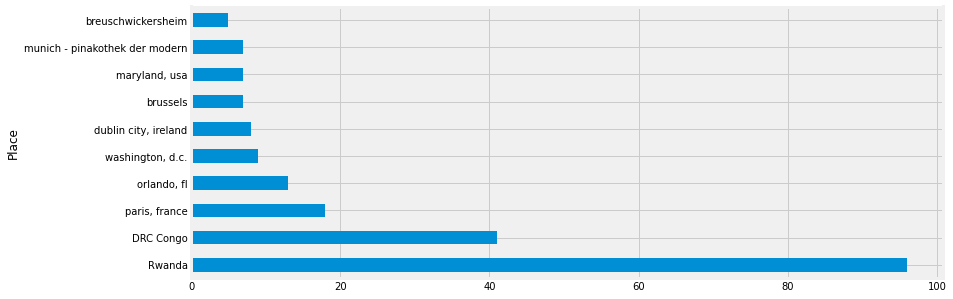

In [31]:
df_tweet['place'].value_counts(sort=True, ascending=False)[:10].plot(kind='barh',
                                                                     figsize=(12,5),xlabel='Place')

In [32]:
df_tweet_date=df_tweet.set_index('created_at')

<AxesSubplot:xlabel='Date,time'>

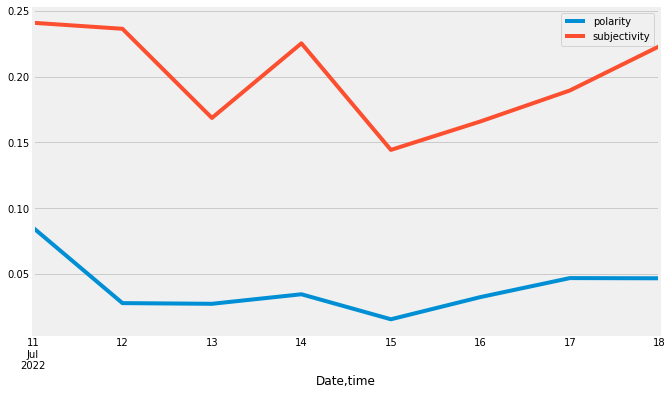

In [33]:
df_tweet_date.resample('D').mean()[['polarity','subjectivity']].dropna().plot(figsize=(10,6),xlabel='Date,time')

### uni-variate Analysis on Hashtags


In [34]:
hashtag_df=df_tweet[['original_text','hashtags','retweet_hashtags']]

In [35]:
def find_hashtags(df_tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', df_tweet)

hashtag_df['hashtag_check']=df_tweet.original_text.apply(find_hashtags)

In [36]:
hashtag_df.dropna(subset=['hashtag_check'],inplace=True)

In [37]:
tags_list=list(hashtag_df['hashtag_check'])

In [38]:
hashtags_list_df = pd.DataFrame([tag for tags_row in tags_list for tag in tags_row],columns=['hashtag'])

In [39]:
hashtags_list_df

,hashtag
0,#Dictator
1,#citation
2,#argent
3,#investissement
4,#andusia
...,...
469,#talks
470,#RDF
471,#Majorit
472,#RDF


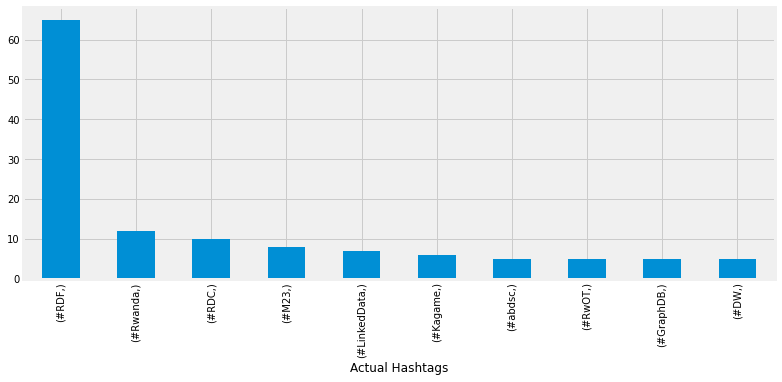

In [40]:
_=hashtags_list_df.value_counts()[:10].plot(kind='bar',figsize=(12,5),xlabel='Actual Hashtags')

In [41]:
#Convert hastags to lowercase
hashtags_list_df['hashtag'] = hashtags_list_df['hashtag'].str.lower()

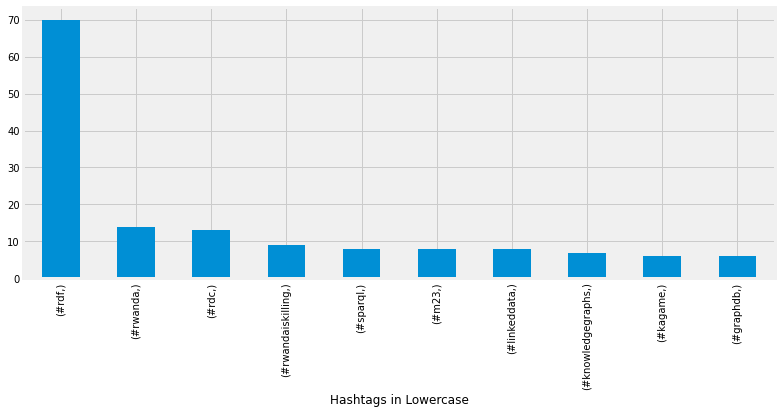

In [42]:
_=hashtags_list_df.value_counts()[:10].plot(kind='bar',figsize=(12,5),xlabel='Hashtags in Lowercase')

In [43]:
user_summary=df_tweet.groupby('original_author').agg({'cleaned_text':'count','followers_count':'max',
                                         'polarity':'mean','subjectivity':'mean', 'sentiment':pd.Series.mode})

In [44]:
user_summary.sort_values(by='cleaned_text',ascending=False).head(10)

,cleaned_text,followers_count,polarity,subjectivity,sentiment
original_author,,,,,
EtudesRwanda,33,500,0.000000,0.000000,Positive
bouche_bee,16,2836,0.047917,0.116667,Neutral
SMARFreedom,15,2390,-0.017273,0.166970,Neutral
acute_tomato,14,17388,-0.036905,0.198810,Neutral
PhotoFinishBot,13,131,0.017486,0.577119,Neutral
kayjoe66,9,14,-0.211111,0.483333,Positive
david_flood,8,1366,0.240230,0.442890,Positive
Michael_Itongi,7,12727,0.000000,0.000000,Negative
humanrobotcoll2,7,29,0.048701,0.178571,Neutral


Sentiment summary of the tweets

In [45]:
text_grouped = df_tweet.groupby('sentiment').count()['cleaned_text'].reset_index()

In [46]:
text_grouped

,sentiment,cleaned_text
0,Negative,164
1,Neutral,270
2,Positive,255


<AxesSubplot:xlabel='sentiment', ylabel='count'>

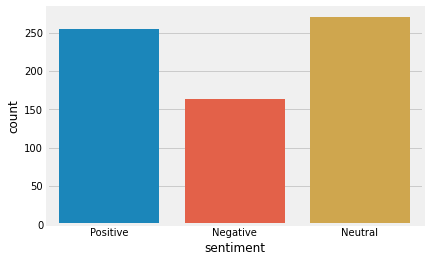

In [47]:
sns.countplot(x='sentiment', data=df_tweet)

**Most frequent words in our tweets dataset**

In [48]:
# English,Kiny,FR, and Only Tweet or Reply.. Remove Retweets

In [49]:
english_tweets=df_tweet.query("tweet_category=='Tweet' or tweet_category== 'Reply'")

In [50]:
# text Preprocessing
english_tweets['cleaned_text'] = english_tweets['cleaned_text'].str.lower()
english_tweets['cleaned_text'] = english_tweets['cleaned_text'].apply(
    lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [51]:
all_words=' '.join(english_tweets.cleaned_text.values)
wordcloud_obj=WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(all_words)

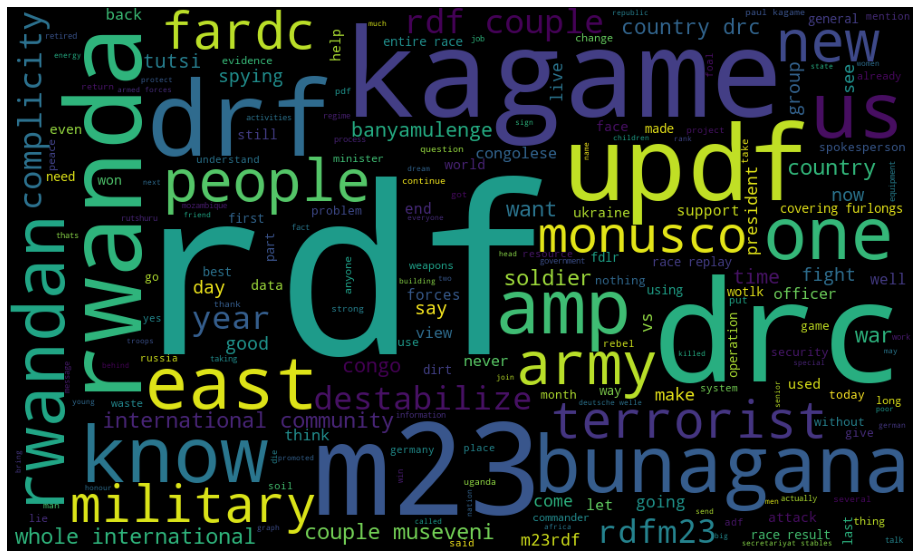

In [52]:
plt.figure(figsize=(20, 10))

fgg=plt.imshow(wordcloud_obj)
plt.axis('off')
# plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

In [53]:
fgg.figure.savefig('plotly_dashboard/cw_rdf.png',bbox_inches='tight',pad_inches=0)

### Topic modeling

In [54]:
def preprocess_data(tweets_df):
    # Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['cleaned_text']]
    word_list = [sent.split() for sent in sentence_list]
    #Save only words and excludes emojis, punctuations
    word_list_new=[]
    for sent in word_list:
        word_list_new.append([re.split(r'\W+',word) for word in sent if word not in STOPWORDS and not word.isdigit()])
    
    word_list_final=[]
    for sent in word_list_new:
        word_list_final.append([i[0] for i in sent])
    # Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list_final)
    corpus_1 = [word_to_id.doc2bow(tweet) for tweet in word_list_final]

    return word_list_final, word_to_id, corpus_1

In [55]:
word_list, id2word, corpus=preprocess_data(english_tweets)

In [56]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=False)

In [57]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('rdf', 0.035275556),
   ('drc', 0.02290793),
   ('kagame', 0.012878964),
   ('country', 0.011910014),
   ('east', 0.009311194),
   ('war', 0.009166013),
   ('updf', 0.00904554),
   ('bunagana', 0.008490109),
   ('fight', 0.007985891),
   ('community', 0.0075539295)]),
 (1,
  [('rdf', 0.03251665),
   ('using', 0.007661162),
   ('day', 0.00670645),
   ('problem', 0.0052995444),
   ('going', 0.00527273),
   ('yet', 0.0038888464),
   ('need', 0.00383663),
   ('another', 0.0036325676),
   ('germany', 0.003302532),
   ('korea', 0.0032496704)]),
 (2,
  [('rdf', 0.015982298),
   ('military', 0.014519503),
   ('', 0.012515028),
   ('kagame', 0.010416001),
   ('rdfm23', 0.009810174),
   ('m23', 0.009797577),
   ('rwanda', 0.009718932),
   ('congo', 0.007421611),
   ('support', 0.0071149147),
   ('anyone', 0.0067020054)]),
 (3,
  [('', 0.058588926),
   ('rdf', 0.037078656),
   ('army', 0.010001833),
   ('drf', 0.0090572),
   ('race', 0.008756654),
   ('amp', 0.007638266),
   ('us', 0.007

### Model Analysis

In [58]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# doc_lda = lda_model[corpus]

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -8.07049656715157

 Ldamodel Coherence Score/Accuracy on Tweets:  0.4301960527890018


**Model 1 words with some digits, 5 topics**

Perplexity:  -9.857909007134007\
Ldamodel Coherence Score/Accuracy on Tweets:  0.4242327533406264

**Model 2 words without digits, 5 topics**

Perplexity:  -9.82031321033761\
Ldamodel Coherence Score/Accuracy on Tweets:  0.4368570452021986

In [59]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.223856 -0.026357       1        1  27.017065
4     -0.043018  0.156660       2        1  21.412549
0     -0.086055 -0.180838       3        1  21.306118
2     -0.019253  0.015889       4        1  15.620457
1     -0.075530  0.034646       5        1  14.643809, topic_info=          Term        Freq       Total Category  logprob  loglift
0               185.000000  185.000000  Default  30.0000  30.0000
5          drc   55.000000   55.000000  Default  29.0000  29.0000
7       kagame   41.000000   41.000000  Default  28.0000  28.0000
410   military   21.000000   21.000000  Default  27.0000  27.0000
20      rwanda   45.000000   45.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
600       good    4.365387   15.226374   Topic5  -5.7566   0.6718
165       data    3.454465    8.319798   Topic5  -5.9906   1.0422
522   actually    3.313375    8.164988   Topic5  -6.0323   1.0193
2356       gas    3.159786    5.739539   Topic5  -6.0798   1.3243
111     change    3.138162    6.812212   Topic5  -6.0866   1.1461

[240 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.804381          
0         2  0.091775          
0         4  0.097174          
522       3  0.489897  actually
522       5  0.367422  actually
...     ...       ...       ...
540       5  0.801256     wotlk
59        1  0.954884     years
542       1  0.986562       yes
1082      5  0.837709       yet
1970      1  0.945244     young

[251 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 3, 2])

###  END

**Number of Topics optimatization**

As we can see the coherence accuracy increases with number of topics which is expected but again \
many topics again would lead to meaningless conclusion. Let's use elbow method to find optimum number of topics

In [60]:
# # Find best LDA Model considering different number of topics

# params_dic={'topics_number':[],'coherence':[],'perplexity':[]}
# for top_number in range(1,10):
#     lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                             id2word=id2word,
#                                             num_topics=top_number, 
#                                             random_state=100,
#                                             update_every=1,
#                                             chunksize=100,
#                                             passes=10,
#                                             alpha='auto',
#                                             per_word_topics=False)
    
#     perplexity=lda_model.log_perplexity(corpus)  
#     # Compute Coherence Score
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
#     coherence_lda = coherence_model_lda.get_coherence()
#     params_dic['topics_number'].append(top_number)
#     params_dic['coherence'].append(coherence_lda)
#     params_dic['perplexity'].append(perplexity)

In [61]:
# pd.DataFrame(params_dic).plot(y=['coherence'])
# # pd.read_csv("elbow_metrics.csv",index_col=0).plot(y=['coherence'])

In [62]:
# import numpy as np

In [63]:
# alphas = list(np.arange(0.01, 3, 0.1))
# alphas.append('symmetric')
# alphas.append('asymmetric')
# alphas.append('auto')

In [64]:
# # Find best LDA Model considering different number of alpha

# params_dic_alpha={'alpha':[],'coherence':[],'perplexity':[]}
# for alpha in alphas:
#     lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                             id2word=id2word,
#                                             num_topics=7, 
#                                             random_state=100,
#                                             update_every=1,
#                                             chunksize=100,
#                                             passes=10,
#                                             alpha=alpha,
#                                             per_word_topics=False)
    
#     perplexity=lda_model.log_perplexity(corpus)  
#     # Compute Coherence Score
#     coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
#     coherence_lda = coherence_model_lda.get_coherence()
#     params_dic_alpha['alpha'].append(alpha)
#     params_dic_alpha['coherence'].append(coherence_lda)
#     params_dic_alpha['perplexity'].append(perplexity)

In [65]:
# pd.DataFrame(params_dic_alpha).plot(y='coherence')#.sort_values('coherence',ascending=False)

**Model with selected optimum parameters**

In [66]:
# # Build LDA model
# lda_model = gensim.models.ldamodel.LdaModel(corpus,
#                                            id2word=id2word,
#                                            num_topics=7, 
#                                            random_state=100,
#                                            update_every=1,
#                                            chunksize=100,
#                                            passes=10,
#                                            alpha=0.1,
#                                            per_word_topics=False)

In [67]:
# pprint(lda_model.show_topics(formatted=False))

In [68]:
# # Compute Perplexity
# #It's a measure of how good the model is. The lower the better. Perplexity is a negative value
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# # doc_lda = lda_model[corpus]

# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)

In [69]:
# # Visualize the topics
# pyLDAvis.enable_notebook()

# LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
# LDAvis_prepared